In [3]:
pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 6.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 5.6 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 5.3 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 5.3 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 5.2 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 5.2 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 5.1 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.3 MB 3.5 MB/s eta 0:00:01
   --------------------------- ------------ 1.6/2.3 MB 4.0 MB/s eta 0:00:01
   ----------------------


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # A forma padrão de importar para plotar
import seaborn as sns           # Para gráficos mais bonitos e fáceis

In [11]:
df_dist = pd.read_csv(r'D:\2025-11-24-Grupo12-Modelo de tráfego de Nagel–Schreckenberg\Distribuido\arquivos\resultados_distribuido.csv', sep=',')

In [12]:
df_paralelo = pd.read_csv(r'D:\2025-11-24-Grupo12-Modelo de tráfego de Nagel–Schreckenberg\Paralelo\arquivos\resultados_paralelo.csv', sep=',')

In [13]:
df_Sequencial = pd.read_csv(r'D:\2025-11-24-Grupo12-Modelo de tráfego de Nagel–Schreckenberg\Sequencial\arquivos\resultados_sequencial.csv', sep=',')

### 1. PADRONIZAÇÃO E UNIÃO DOS DADOS

In [18]:
# Adiciona coluna de identificação e padroniza 'Workers'
# Sequencial: Consideramos 1 Worker para fins de gráfico
df_Sequencial['Tipo'] = 'Sequencial'
df_Sequencial['Workers'] = 1

In [20]:
# Paralelo: Renomeia Num_Threads para Workers
df_paralelo['Tipo'] = 'Paralelo'
df_paralelo.rename(columns={'Num_Threads': 'Workers'}, inplace=True)

In [21]:
# Distribuído: Renomeia Num_Workers para Workers
df_dist['Tipo'] = 'Distribuído'
df_dist.rename(columns={'Num_Workers': 'Workers'}, inplace=True)

In [23]:
# Seleciona apenas as colunas que importam
cols_interesse = ['Tipo', 'Comprimento_Estrada', 'Densidade', 'Workers', 'Tempo_s']

# Une os DataFrames em um só
df_geral = pd.concat([
    df_Sequencial[cols_interesse], 
    df_paralelo[cols_interesse], 
    df_dist[cols_interesse]
], ignore_index=True)

In [28]:
df_geral.head() 

,Tipo,Comprimento_Estrada,Densidade,Workers,Tempo_s
0,Sequencial,1000,0.1,1,0.074217
1,Sequencial,1000,0.3,1,0.129927
2,Sequencial,1000,0.5,1,0.165168
3,Sequencial,5000,0.1,1,0.378265
4,Sequencial,5000,0.3,1,0.773099


In [29]:
df_geral.tail()  

,Tipo,Comprimento_Estrada,Densidade,Workers,Tempo_s
55,Distribuído,1000,0.3,4,0.477532
56,Distribuído,5000,0.1,4,0.647154
57,Distribuído,5000,0.3,4,1.008532
58,Distribuído,10000,0.1,4,1.104878
59,Distribuído,10000,0.3,4,1.923486


### 2. CÁLCULO DE SPEEDUP E EFICIÊNCIA

In [40]:
# Calcula a média do tempo sequencial para cada Tamanho e Densidade
# Isso serve de "Baseline" (Linha de base)
baseline = df_Sequencial.groupby(['Comprimento_Estrada', 'Densidade'])['Tempo_s'].mean().reset_index()
baseline.rename(columns={'Tempo_s': 'Tempo_Seq_Ref'}, inplace=True)

In [42]:
# Junta essa referência no dataframe geral
df_analise = pd.merge(df_geral, baseline, on=['Comprimento_Estrada', 'Densidade'], how='left')

In [33]:
# Fórmula do Speedup: T_sequencial / T_paralelo
df_analise['Speedup'] = df_analise['Tempo_Seq_Ref'] / df_analise['Tempo_s']

In [34]:
# Fórmula da Eficiência: Speedup / Número de Recursos (Workers)
df_analise['Eficiencia'] = df_analise['Speedup'] / df_analise['Workers']

In [35]:
df_analise.head()

,Tipo,Comprimento_Estrada,Densidade,Workers,Tempo_s,Tempo_Seq_Ref,Speedup,Eficiencia
0,Sequencial,1000,0.1,1,0.074217,0.074217,1.0,1.0
1,Sequencial,1000,0.3,1,0.129927,0.129927,1.0,1.0
2,Sequencial,1000,0.5,1,0.165168,0.165168,1.0,1.0
3,Sequencial,5000,0.1,1,0.378265,0.378265,1.0,1.0
4,Sequencial,5000,0.3,1,0.773099,0.773099,1.0,1.0


### TABELA COMPARATIVA (MÉDIAS)

In [36]:
print("=== Tabela Comparativa de Tempos (Médias) ===")
tabela_resumo = df_analise.pivot_table(
    index=['Comprimento_Estrada', 'Densidade'], 
    columns=['Tipo', 'Workers'], 
    values='Tempo_s'
)
display(tabela_resumo)

=== Tabela Comparativa de Tempos (Médias) ===


Tipo                          Distribuído            Paralelo            \
Workers                                 2         4         2         4   
Comprimento_Estrada Densidade                                             
1000                0.1          0.173870  0.285957  0.137088  0.230915   
                    0.3          0.331214  0.477532  0.283157  0.269615   
                    0.5               NaN       NaN  0.225529  0.393242   
5000                0.1          0.614512  0.647154  0.584619  0.840058   
                    0.3          0.981330  1.008532  0.850827  1.021780   
                    0.5               NaN       NaN  1.047225  1.733880   
10000               0.1          0.820763  1.104878  1.067426  1.310415   
                    0.3          1.971058  1.923486  1.606464  1.810986   
                    0.5               NaN       NaN  1.990223  2.506706   
20000               0.1               NaN       NaN  2.326462  3.223526   
                    0.3               NaN       NaN  3.592852  4.674880   
                    0.5               NaN       NaN  4.048595  5.572803   

Tipo                                    Sequencial  
Workers                               8          1  
Comprimento_Estrada Densidade                       
1000                0.1        0.293243   0.074217  
                    0.3        0.345149   0.129927  
                    0.5        0.366793   0.165168  
5000                0.1        0.919623   0.378265  
                    0.3        1.192972   0.773099  
                    0.5        1.286801   0.742924  
10000               0.1        1.433171   0.903728  
                    0.3        2.065026   1.153810  
                    0.5        2.804439   1.483624  
20000               0.1        2.631761   1.595292  
                    0.3        4.080291   2.579476  
                    0.5        4.615033   3.183885

### 4. GERAÇÃO DOS GRÁFICOS

Gráfico de Tempo x Tamanho 
- Este gráfico mostra o tempo absoluto (em segundos) gasto para completar a simulação em função do tamanho do problema (Comprimento da Estrada).

- Eixo X: Tamanho da Estrada (Carga de Trabalho). Eixo Y: Tempo em segundos (geralmente em escala logarítmica).

- Interpetração
    - Inclinação da Reta: Quanto mais inclinada a reta, pior é a escalabilidade. Se a linha sobe abruptamente, o algoritmo sofre muito com o aumento de dados.
    
    - Comparação Visual: As linhas que estão mais abaixo representam as soluções mais rápidas.
    
    - Ponto de Cruzamento (Crossover): Em tamanhos pequenos (ex: 1.000 células), é comum que a versão Sequencial seja mais rápida que a Distribuída. Isso ocorre porque o custo de "preparar" a rede (Overhead) é maior que o tempo de apenas calcular. O ponto onde a versão Paralela/Distribuída cruza e fica abaixo da Sequencial é onde o paralelismo começa a valer a pena.


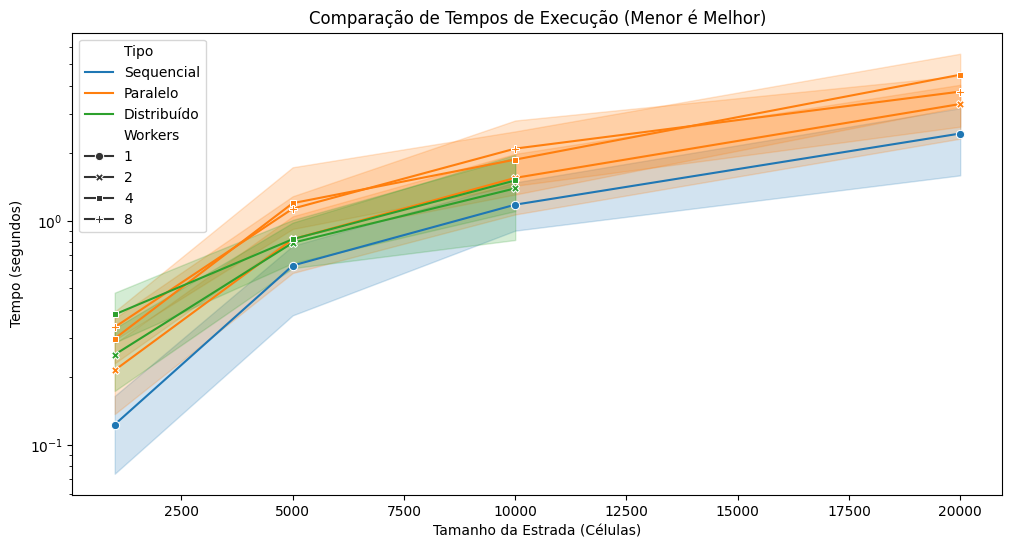

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_analise, 
    x='Comprimento_Estrada', 
    y='Tempo_s', 
    hue='Tipo', 
    style='Workers', 
    markers=True, dashes=False
)
plt.title('Comparação de Tempos de Execução (Menor é Melhor)')
plt.ylabel('Tempo (segundos)')
plt.xlabel('Tamanho da Estrada (Células)')
plt.yscale('log') # Escala Log ajuda a ver melhor se houver muita diferença
plt.show()

Gráfico de Speedup
- O Speedup mede o ganho de velocidade relativo à versão sequencial.

- Eixo X: Número de Trabalhadores (Threads ou Hosts). Eixo Y: Speedup (quantas vezes mais rápido).

- interpetração:
    
    - Linha de Referência (1.0): O valor 1.0 (linha vermelha no gráfico) é o desempenho da versão Sequencial.
        
        - Acima de 1.0: A paralelização trouxe ganho de desempenho (Sucesso).
        
        - Abaixo de 1.0: A paralelização tornou o código mais lento (Slowdown).
    
    - Speedup Linear (Ideal): Se você usa 2 processadores, o ideal seria um Speedup de 2x. Se usa 4, Speedup de 4x. Na prática, isso raramente acontece devido à parte sequencial do código e custos de comunicação.


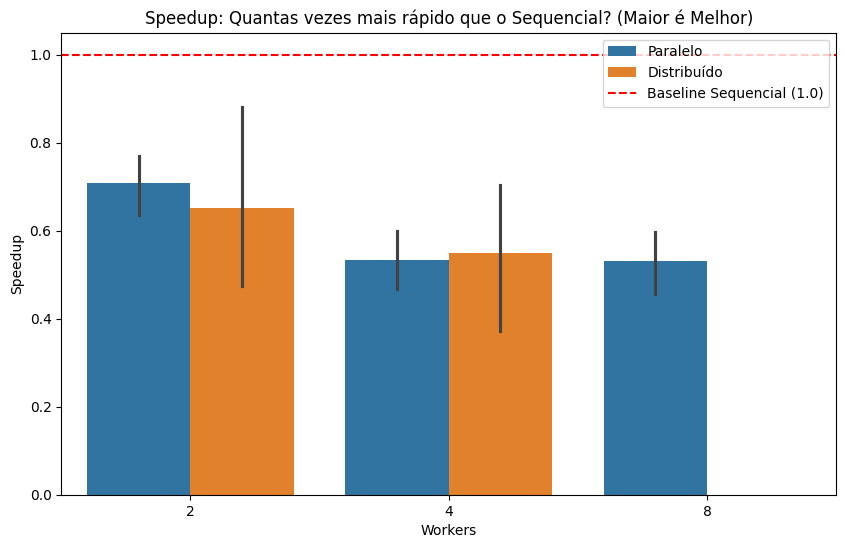

In [38]:
df_speedup = df_analise[df_analise['Tipo'] != 'Sequencial']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_speedup, 
    x='Workers', 
    y='Speedup', 
    hue='Tipo'
)
plt.axhline(1, color='red', linestyle='--', label='Baseline Sequencial (1.0)')
plt.title('Speedup: Quantas vezes mais rápido que o Sequencial? (Maior é Melhor)')
plt.legend()
plt.show()

Gráfico de Eficiência
- A eficiência mede o quão bem os recursos extras estão sendo utilizados.

-  Eixo X: Número de Trabalhadores. Eixo Y: Eficiência (0 a 1, ou 0% a 100%).

- Interpetração:
    
    - Valor Ideal (1.0): Significa que cada processador adicionado contribuiu 100% para a velocidade.
    
    - Queda da Curva: É normal que a eficiência caia conforme aumentamos o número de trabalhadores.
    
    - Eficiência Baixa (< 0.5): Indica que os processadores estão passando mais tempo esperando (idle) ou comunicando do que calculando.
 

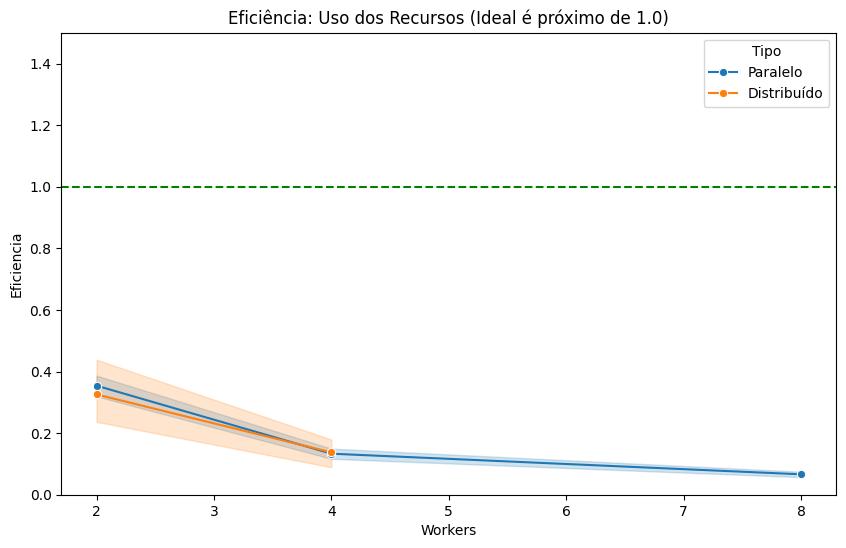

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_speedup,
    x='Workers',
    y='Eficiencia',
    hue='Tipo',
    marker='o'
)
plt.axhline(1, color='green', linestyle='--', label='Eficiência Ideal (1.0)')
plt.title('Eficiência: Uso dos Recursos (Ideal é próximo de 1.0)')
plt.ylim(0, 1.5) 
plt.show()